### Objective:
To classify images in the Caltech-256 dataset, which is an improvement over Caltech-101 dataset using a Convolutional Neural Network.

### Problem Statement
To build and implement a Convolutional Neural Network model to classify images in the Caltech-256 dataset.

At the end of this competition, you will be able to:

* Load and extract features of images available in the Caltech-256 dataset using ImageDataGenerator

* Build convolutional neural networks using either Keras or PyTorch deep learning libraries

* Use the pre-trained models using either Keras or PyTorch deep learning libraries

### Description:
Caltech-256 is an object recognition dataset containing approximately 30,000 real-world images, of different sizes, spanning 256 classes (256 object classes and an additional clutter class). Each class is represented by at least 80 images. The dataset is a superset of the Caltech-101 dataset.

Here is a handy link to Kaggle's competition documentation (https://www.kaggle.com/docs/competitions), which includes, among other things, instructions on submitting predictions (https://www.kaggle.com/docs/competitions#making-a-submission).

### Instructions for downloading train and test data are as follows:

### 1. Create an API key in Kaggle.

To do this, go to the competition site on Kaggle at https://www.kaggle.com/t/185418aa7ed24db3b98ed851a4db2b41 and click on user then click on your profile as shown below. Click Account.

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP.PNG)



### 2. Next, scroll down to the API access section and click on **Create New Token** to download an API key (kaggle.json).

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP_1.PNG)

### 3. Upload your kaggle.json file using the following snippet in a code cell:



In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ssupadhya","key":"81ce823351b2ccd64407dea6e828835d"}'}

In [2]:
#If successfully uploaded in the above step, the 'ls' command here should display the kaggle.json file.
%ls

kaggle.json  sample_data/


### 4. Install the Kaggle API using the following command


In [3]:
!pip install -U -q kaggle==1.5.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchdata 0.6.1 requires urllib3>=1.25, but you have urllib3 1.24.3 which is incompatible.


### 5. Move the kaggle.json file into ~/.kaggle, which is where the API client expects your token to be located:



In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
#Execute the following command to verify whether the kaggle.json is stored in the appropriate location: ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [6]:
!chmod 600 /root/.kaggle/kaggle.json #run this command to ensure your Kaggle API token is secure on colab

### 6. Now download the Test Data from Kaggle

**NOTE: If you get a '403 - Not Found' error after running the cell below, it is most likely that the user (whose kaggle.json is uploaded above) has not 'accepted' the rules of the competition and therefore has 'not joined' the competition.**

If you encounter **401-unauthorised** download latest **kaggle.json** by repeating steps 1 & 2

In [7]:
#If you get a forbidden link, you have most likely not joined the competition.
!kaggle competitions download -c classification-of-caltech-256-images

 99% 312M/316M [00:06<00:00, 56.7MB/s]
100% 316M/316M [00:06<00:00, 52.3MB/s]


In [8]:
!unzip classification-of-caltech-256-images

Streaming output truncated to the last 5000 lines.
  inflating: test/4759.jpg           
  inflating: test/476.jpg            
  inflating: test/4760.jpg           
  inflating: test/4761.jpg           
  inflating: test/4762.jpg           
  inflating: test/4763.jpg           
  inflating: test/4764.jpg           
  inflating: test/4765.jpg           
  inflating: test/4766.jpg           
  inflating: test/4767.jpg           
  inflating: test/4768.jpg           
  inflating: test/4769.jpg           
  inflating: test/477.jpg            
  inflating: test/4770.jpg           
  inflating: test/4771.jpg           
  inflating: test/4772.jpg           
  inflating: test/4773.jpg           
  inflating: test/4774.jpg           
  inflating: test/4775.jpg           
  inflating: test/4776.jpg           
  inflating: test/4777.jpg           
  inflating: test/4778.jpg           
  inflating: test/4779.jpg           
  inflating: test/478.jpg            
  inflating: test/4780.jpg           

### 7. Download the Train Data

In [9]:
%%capture
!wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Caltech_256_Train.zip

!unzip "Caltech_256_Train.zip"

## Grading = 10 Marks

## YOUR CODING STARTS FROM HERE

### Import Required packages

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, utils

### **Stage 1:** Data Loading and preprocessing of Images (3 points)

In [11]:
# Define train and test transforms for data preprocessing and image augmentation
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize((0.4839, 0.4528, 0.3962), (0.2702, 0.2655, 0.2745))])

In [12]:
# Loading the train set file
train_data_folder = "/content/Caltech_256_Train" # Train directory for loading images
total_dataset = datasets.ImageFolder(root=train_data_folder, transform=transform)

In [13]:
# splitting between train and Validation set
train_size = int(0.8 * len(total_dataset))  # 80% for training
val_size = len(total_dataset) - train_size  # Remaining 10% for validation
train_data, val_data = torch.utils.data.random_split(total_dataset, [train_size, val_size])

In [14]:
#defiining train_batch_size
train_batch_size = 64

In [15]:
# Create data loaders for training and validation
train_loader = torch.utils.data.DataLoader(train_data, batch_size=train_batch_size,shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=train_batch_size,shuffle=False)

In [19]:
# Loading the test set file
test_data_folder = "/content/Kaggle2Test" # Test directory for loading images
test_data = datasets.ImageFolder(root=test_data_folder, transform=transform)

In [20]:
test_data.classes

['test']

In [21]:
# Generate a batches of images and labels
train_images, train_labels = next(iter(train_loader))
train_images.shape, train_labels.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [23]:
# labels Translator
label_names = {v: k for k, v in total_dataset.class_to_idx.items()}
label_names

{0: 'Airplanes-101',
 1: 'Ak47',
 2: 'American-Flag',
 3: 'Backpack',
 4: 'Baseball-Bat',
 5: 'Baseball-Glove',
 6: 'Basketball-Hoop',
 7: 'Bat',
 8: 'Bathtub',
 9: 'Bear',
 10: 'Beer-Mug',
 11: 'Billiards',
 12: 'Binoculars',
 13: 'Birdbath',
 14: 'Blimp',
 15: 'Bonsai-101',
 16: 'Boom-Box',
 17: 'Bowling-Ball',
 18: 'Bowling-Pin',
 19: 'Boxing-Glove',
 20: 'Brain-101',
 21: 'Breadmaker',
 22: 'Buddha-101',
 23: 'Bulldozer',
 24: 'Butterfly',
 25: 'Cactus',
 26: 'Cake',
 27: 'Calculator',
 28: 'Camel',
 29: 'Cannon',
 30: 'Canoe',
 31: 'Car-Tire',
 32: 'Cartman',
 33: 'Cd',
 34: 'Centipede',
 35: 'Cereal-Box',
 36: 'Chandelier-101',
 37: 'Chess-Board',
 38: 'Chimp',
 39: 'Chopsticks',
 40: 'Clutter',
 41: 'Cockroach',
 42: 'Coffee-Mug',
 43: 'Coffin',
 44: 'Coin',
 45: 'Comet',
 46: 'Computer-Keyboard',
 47: 'Computer-Monitor',
 48: 'Computer-Mouse',
 49: 'Conch',
 50: 'Cormorant',
 51: 'Covered-Wagon',
 52: 'Cowboy-Hat',
 53: 'Crab-101',
 54: 'Desk-Globe',
 55: 'Diamond-Ring',
 56: '

#### Analyze the shape of images and distribution of classes

In [24]:
# No of Categories
num_classes = len(total_dataset.classes)
dataset_size = len(total_dataset)
classes = total_dataset.classes
print(num_classes, dataset_size)

256 21008


In [25]:
img_dict = {}
for i in range(num_classes):
    img_dict[classes[i]] = 0

for i in range(dataset_size):
    img, label = total_dataset[i]
    img_dict[classes[label]] += 1
img_dict

{'Airplanes-101': 560,
 'Ak47': 67,
 'American-Flag': 67,
 'Backpack': 105,
 'Baseball-Bat': 88,
 'Baseball-Glove': 103,
 'Basketball-Hoop': 59,
 'Bat': 73,
 'Bathtub': 161,
 'Bear': 71,
 'Beer-Mug': 65,
 'Billiards': 194,
 'Binoculars': 151,
 'Birdbath': 67,
 'Blimp': 59,
 'Bonsai-101': 85,
 'Boom-Box': 63,
 'Bowling-Ball': 72,
 'Bowling-Pin': 70,
 'Boxing-Glove': 86,
 'Brain-101': 49,
 'Breadmaker': 98,
 'Buddha-101': 64,
 'Bulldozer': 77,
 'Butterfly': 78,
 'Cactus': 79,
 'Cake': 74,
 'Calculator': 70,
 'Camel': 75,
 'Cannon': 72,
 'Canoe': 71,
 'Car-Tire': 62,
 'Cartman': 68,
 'Cd': 71,
 'Centipede': 68,
 'Cereal-Box': 60,
 'Chandelier-101': 72,
 'Chess-Board': 84,
 'Chimp': 76,
 'Chopsticks': 59,
 'Clutter': 578,
 'Cockroach': 84,
 'Coffee-Mug': 60,
 'Coffin': 60,
 'Coin': 85,
 'Comet': 70,
 'Computer-Keyboard': 58,
 'Computer-Monitor': 93,
 'Computer-Mouse': 65,
 'Conch': 72,
 'Cormorant': 74,
 'Covered-Wagon': 67,
 'Cowboy-Hat': 79,
 'Crab-101': 57,
 'Desk-Globe': 57,
 'Diamond-

In [63]:
ind= {k:i for i,k in enumerate(img_dict.keys())}

{'Airplanes-101': 0,
 'Ak47': 1,
 'American-Flag': 2,
 'Backpack': 3,
 'Baseball-Bat': 4,
 'Baseball-Glove': 5,
 'Basketball-Hoop': 6,
 'Bat': 7,
 'Bathtub': 8,
 'Bear': 9,
 'Beer-Mug': 10,
 'Billiards': 11,
 'Binoculars': 12,
 'Birdbath': 13,
 'Blimp': 14,
 'Bonsai-101': 15,
 'Boom-Box': 16,
 'Bowling-Ball': 17,
 'Bowling-Pin': 18,
 'Boxing-Glove': 19,
 'Brain-101': 20,
 'Breadmaker': 21,
 'Buddha-101': 22,
 'Bulldozer': 23,
 'Butterfly': 24,
 'Cactus': 25,
 'Cake': 26,
 'Calculator': 27,
 'Camel': 28,
 'Cannon': 29,
 'Canoe': 30,
 'Car-Tire': 31,
 'Cartman': 32,
 'Cd': 33,
 'Centipede': 34,
 'Cereal-Box': 35,
 'Chandelier-101': 36,
 'Chess-Board': 37,
 'Chimp': 38,
 'Chopsticks': 39,
 'Clutter': 40,
 'Cockroach': 41,
 'Coffee-Mug': 42,
 'Coffin': 43,
 'Coin': 44,
 'Comet': 45,
 'Computer-Keyboard': 46,
 'Computer-Monitor': 47,
 'Computer-Mouse': 48,
 'Conch': 49,
 'Cormorant': 50,
 'Covered-Wagon': 51,
 'Cowboy-Hat': 52,
 'Crab-101': 53,
 'Desk-Globe': 54,
 'Diamond-Ring': 55,
 'Dice

In [26]:
max(img_dict,key=img_dict.get)

'Clutter'

In [46]:
len(img_dict)

256

In [27]:
img_dict['Clutter']

578

In [28]:
min(img_dict,key=img_dict.get)

'Sheet-Music'

In [29]:
img_dict['Sheet-Music']

42

In [30]:
total = sum(img_dict.values())
answer = {k: v/total*100 for k,v in img_dict.items()}

In [31]:
answer

{'Airplanes-101': 2.6656511805026657,
 'Ak47': 0.3189261233815689,
 'American-Flag': 0.3189261233815689,
 'Backpack': 0.49980959634424976,
 'Baseball-Bat': 0.41888804265041885,
 'Baseball-Glove': 0.49028941355674033,
 'Basketball-Hoop': 0.2808453922315309,
 'Bat': 0.3474866717440975,
 'Bathtub': 0.7663747143945163,
 'Bear': 0.337966488956588,
 'Beer-Mug': 0.3094059405940594,
 'Billiards': 0.9234577303884235,
 'Binoculars': 0.7187738004569687,
 'Birdbath': 0.3189261233815689,
 'Blimp': 0.2808453922315309,
 'Bonsai-101': 0.4046077684691546,
 'Boom-Box': 0.2998857578065499,
 'Bowling-Ball': 0.3427265803503427,
 'Bowling-Pin': 0.3332063975628332,
 'Boxing-Glove': 0.4093678598629094,
 'Brain-101': 0.23324447829398323,
 'Breadmaker': 0.46648895658796646,
 'Buddha-101': 0.30464584920030463,
 'Bulldozer': 0.36652703731911657,
 'Butterfly': 0.3712871287128713,
 'Cactus': 0.37604722010662606,
 'Cake': 0.35224676313785225,
 'Calculator': 0.3332063975628332,
 'Camel': 0.357006854531607,
 'Cannon':

In [32]:
# Size of one training image
train_data[0][0].size()

torch.Size([3, 224, 224])

In [33]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([64, 3, 224, 224]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor


#### Visualize the sample images of each class


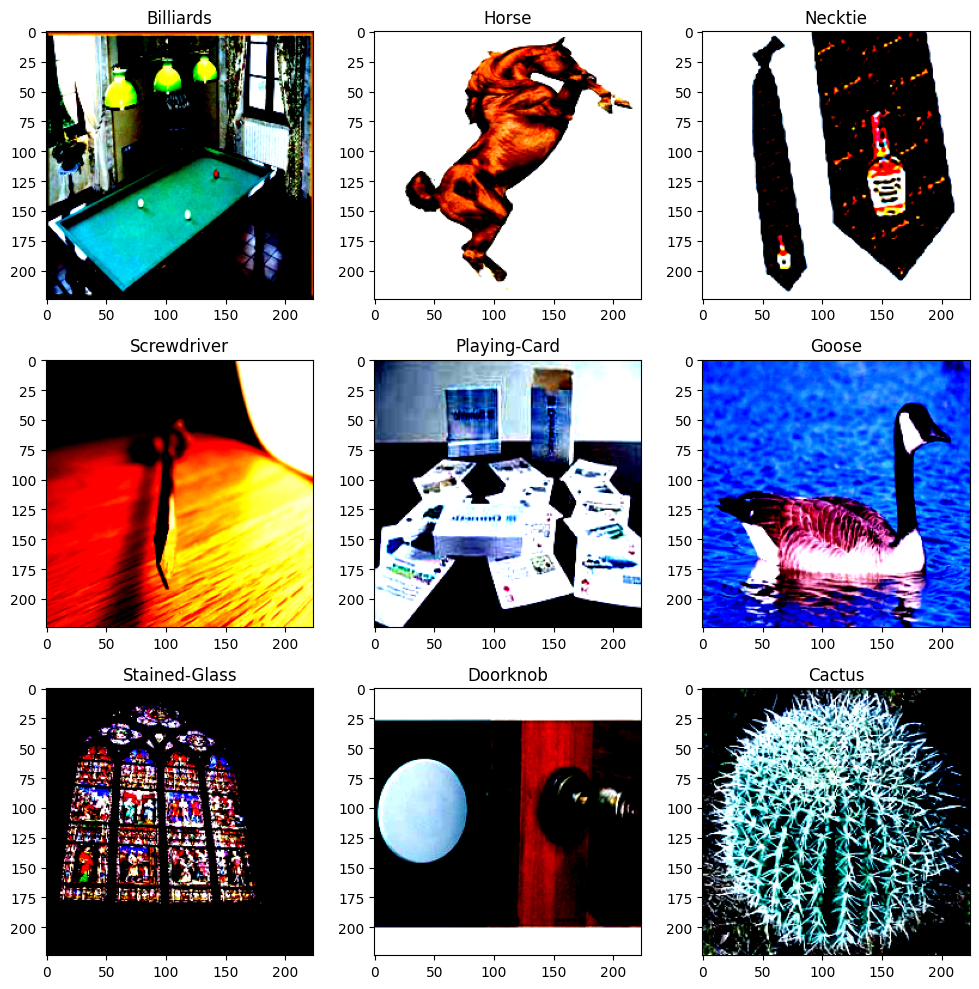

In [34]:
# Create a grid of images along with their corresponding labels
L = 3
W = 3

fig, axes = plt.subplots(L, W, figsize = (10, 10))
axes = axes.reshape(-1)

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i].permute(1, 2, 0))
    axes[i].set_title(label_names[train_labels[i].item()])
    axes[i].axis('on')

plt.tight_layout()

### **Stage 2:** Build and train the CNN model using Keras/Pytorch (5 points)

You can train the CNN model and Pre-trained model and then compare the model performance on the kaggle testset


### Transfer learning

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.



#### Use the pre-trained models

* Load the pre-trained model
* Train and evaluate the images

In [35]:
# To test whether GPU instance is present in the system of not.
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)

Using PyTorch version: 2.0.1+cu118 CUDA: False


In [36]:
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cpu')

In [37]:
# Creating a CNN class
class ConvNeuralNet(nn.Module):
	#  Determine what layers and their order in CNN object
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5)
        self.relu1 = nn.ReLU()
        self.conv_layer2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5)
        self.relu2 = nn.ReLU()
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)
        self.relu3 = nn.ReLU()
        self.conv_layer4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.relu4 = nn.ReLU()
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.relu5 = nn.ReLU()
        self.conv_layer6 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3)
        self.relu6 = nn.ReLU()
        self.max_pool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer7 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3)
        self.relu7 = nn.ReLU()
        self.max_pool4 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        #self.fc1 = nn.Linear(1600, 512)
        self.fc1 = nn.Linear(30976, 10000)
        self.relu8 = nn.ReLU()
        self.fc2 = nn.Linear(10000, 5000)
        self.relu9 = nn.ReLU()
        self.fc3 = nn.Linear(5000, num_classes)

    # Progresses data across layers
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.relu1(out)
        out = self.conv_layer2(out)
        out = self.relu2(out)
        out = self.max_pool1(out)

        out = self.conv_layer3(out)
        out = self.relu3(out)
        out = self.conv_layer4(out)
        out = self.relu4(out)
        out = self.max_pool2(out)

        out = self.conv_layer5(out)
        out = self.relu5(out)
        out = self.conv_layer6(out)
        out = self.relu6(out)
        out = self.max_pool3(out)

        out = self.conv_layer7(out)
        out = self.relu7(out)
        out = self.max_pool4(out)

        out = out.reshape(out.size(0), -1)

        out = self.fc1(out)
        out = self.relu8(out)
        out = self.fc2(out)
        out = self.relu9(out)
        out = self.fc3(out)
        return out

In [38]:
learning_rate = 0.001
num_epochs = 5

In [39]:
model = ConvNeuralNet(num_classes)
model = model.to(device)
# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

total_step = len(train_loader)

In [40]:
print(model)

ConvNeuralNet(
  (conv_layer1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (conv_layer2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (conv_layer4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu4): ReLU()
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (relu5): ReLU()
  (conv_layer6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (relu6): ReLU()
  (max_pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (relu7): ReLU()
  (max_pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=

In [42]:
# We use the pre-defined number of epochs to determine how many iterations to train the network on
#for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    #for i, (images, labels) in enumerate(train_loader):
     #   # Move tensors to the configured device
     #   images = images.to(device)
     #   labels = labels.to(device)

        # Forward pass
     #   outputs = model(images)
     #   loss = criterion(outputs, labels)

        # Backward and optimize
     #   optimizer.zero_grad()
     #   loss.backward()
     #   optimizer.step()

    #print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [43]:
from tqdm import tqdm

In [44]:
train_accu = []     # Empty list for saving train accuracy
train_losses = []   # Empty list for saving train losses

def train(epoch):

  print('\nEpoch : %d'%epoch)

  model.train()    # Initiate the model in training mode

  running_loss=0
  correct=0
  total=0

  # Loop through each batch of images in train set
  for data in tqdm(train_loader):

    inputs, labels = data[0].to(device), data[1].to(device)   # Loading the input tensors into CUDA GPU

    # Zero out the gradients from the preivous step
    optimizer.zero_grad()

    # Forward pass (this calls the "forward" function within model_ft)
    outputs = model(inputs)

    # Calculating the loss
    loss = criterion(outputs, labels)

    # Back Propagation for calculaing gradients and adjusting weights
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    # Picking the class/label with maximum probability
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()


  train_loss = running_loss/len(train_loader)     # Calculating the mean of training loss
  accu = 100.*correct/total                       # Calculating the accuracy

  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [45]:
epochs = 5
for epoch in range(1, epochs+1):
  train(epoch)


Epoch : 1


100%|██████████| 263/263 [1:52:31<00:00, 25.67s/it]


Train Loss: 5.441 | Accuracy: 2.636

Epoch : 2


 20%|██        | 53/263 [22:57<1:30:58, 25.99s/it]


KeyboardInterrupt: ignored

###   **Stage 3**: Evaluate the Model and get model predictions on the Kaggle testset (2 Points)









In [ ]:
model.eval()

In [ ]:
predictions = []
labels = []
j = 0

# Loop through the test set
for i, data in enumerate(train_loader):
  input, label = data
  # print(input.shape ,test_data.classes[label])

  # Forward pass (this calls the "forward" function within model_ft)
  output = model(input.to(device))

  # Output as max probability
  pred = torch.max(output,1)

  # Storing the actuals and the predictions
  labels.append(test_data.classes[label])
  predictions.append(test_data.classes[pred.indices])
  if test_data.classes[pred.indices] == test_data.classes[label]:
    j+=1

In [ ]:
print(j/len(train_loader))

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the validation images: {} %'.format(100 * correct / total))

Accuracy of the network on the validation images: 2.5226082817705855 %


### Report Analysis

- Compare the accuracies for the Pre-trained vs CNN models
- What process was followed to tune the hyperparameters?
- Plot the confusion matrix in terms of the misclassifications